In [44]:
import numpy as np
import pandas as pd
import polars as pl
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [45]:
import plotly.io as pio
pio.renderers.default = "png" 

In [46]:
path = r"C:\Users\Rudra\Desktop\bihar-viz\data\BL02.parquet"

In [47]:
df = pl.read_parquet(path)

In [48]:
df.columns

['Survey_Name',
 'Year',
 'FSU_Serial_No',
 'Sector',
 'State',
 'NSS_Region',
 'District',
 'Stratum',
 'Sub_stratum',
 'Panel',
 'Sub_sample',
 'FOD_Sub_Region',
 'Sample_SU_No',
 'Sample_Sub_Division_No',
 'Second_Stage_Stratum_No',
 'Sample_Household_No',
 'Questionnaire_No',
 'Level',
 'Person_Serial_No',
 'Relation_to_Head',
 'Gender',
 'Age',
 'Marital_Status',
 'Education_Level',
 'Years_of_Education',
 'Used_Internet_Last_30_Days',
 'Days_Away_From_Home_Last_30_Days',
 'Meals_Usually_Taken_Per_Day',
 'Meals_From_School',
 'Meals_From_Employer',
 'Meals_Other',
 'Meals_On_Payment',
 'Meals_At_Home',
 'Revisit_Status',
 'FDQ_Original_Member',
 'Multiplier',
 'Sector_label',
 'State_label',
 'Relation_to_Head_label',
 'Gender_label',
 'Marital_Status_label',
 'Education_Level_label',
 'Used_Internet_Last_30_Days_label',
 'ingest_timestamp',
 'ingest_date']

In [49]:
# Because this are continous variables
pca_features = [
    "Age",
    "Years_of_Education",
    "Days_Away_From_Home_Last_30_Days",
    "Meals_Usually_Taken_Per_Day",
    "Meals_From_School",
    "Meals_From_Employer",
    "Meals_Other",
    "Meals_On_Payment",
    "Meals_At_Home",
    "Multiplier" # This is provide by the survey so added
]

Cluster 0:
- Mostly rural
- Lower education
- High meals at home

Cluster 1:
- Urban
- Higher education
- More meals outside


In [50]:
df[pca_features].describe()

statistic,Age,Years_of_Education,Days_Away_From_Home_Last_30_Days,Meals_Usually_Taken_Per_Day,Meals_From_School,Meals_From_Employer,Meals_Other,Meals_On_Payment,Meals_At_Home,Multiplier
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",85751.0,55591.0,85739.0,85733.0,26787.0,20194.0,22239.0,21093.0,85643.0,85751.0
"""null_count""",0.0,30160.0,12.0,18.0,58964.0,65557.0,63512.0,64658.0,108.0,0.0
"""mean""",26.985586,8.733788,0.093283,2.747437,6.001493,0.228583,0.903638,0.845589,80.082891,127515.328288
"""std""",18.774229,4.349987,1.042205,0.463277,8.602277,2.251846,4.045566,5.873162,14.473524,49484.561175
"""min""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7482.0
"""25%""",12.0,5.0,0.0,3.0,0.0,0.0,0.0,0.0,67.0,99685.0
"""50%""",24.0,9.0,0.0,3.0,0.0,0.0,0.0,0.0,90.0,135551.0
"""75%""",40.0,12.0,0.0,3.0,15.0,0.0,0.0,0.0,90.0,159822.0
"""max""",105.0,20.0,30.0,3.0,26.0,90.0,90.0,90.0,95.0,430044.0


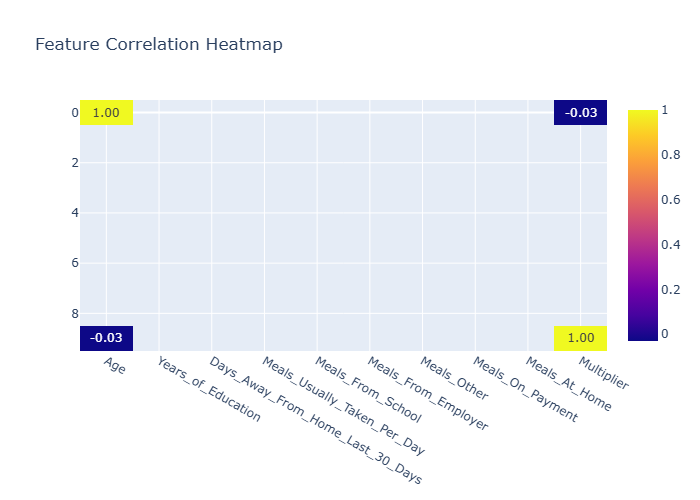

In [51]:
corr = df[pca_features].corr()

fig = px.imshow(
    corr,
    text_auto=".2f",
    aspect="auto",
    title="Feature Correlation Heatmap"
)
fig.show()

In [52]:
X = df[pca_features].fill_null(0)

In [53]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [54]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [55]:

explained_df = pd.DataFrame({
    "PC": [f"PC{i+1}" for i in range(len(pca.explained_variance_ratio_))],
    "Explained_Variance": pca.explained_variance_ratio_,
    "Cumulative_Variance": np.cumsum(pca.explained_variance_ratio_)
})

explained_df


,PC,Explained_Variance,Cumulative_Variance
0,PC1,0.208705,0.208705
1,PC2,0.164930,0.373636
2,PC3,0.144054,0.517689
3,PC4,0.106934,0.624624
4,PC5,0.099011,0.723635
5,PC6,0.095103,0.818738
6,PC7,0.083683,0.902421
7,PC8,0.066935,0.969356
8,PC9,0.030553,0.999910
9,PC10,0.000090,1.000000


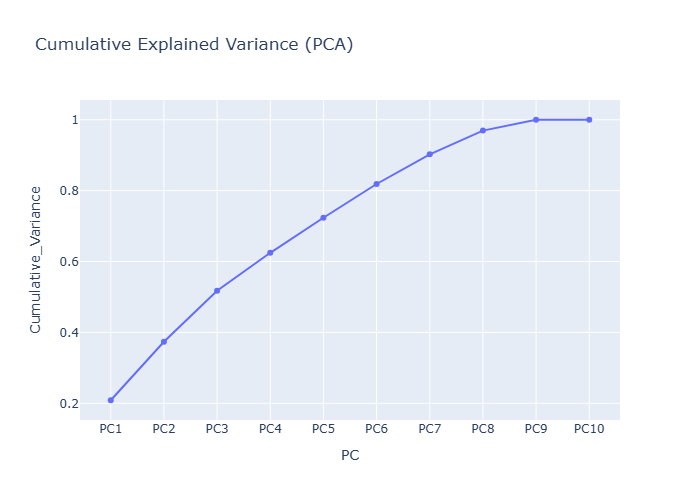

In [56]:
fig = px.line(
    explained_df,
    x="PC",
    y="Cumulative_Variance",
    markers=True,
    title="Cumulative Explained Variance (PCA)"
)
fig.show()


In [57]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(pca.components_.shape[0])],
    index=pca_features
)

loadings


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Age,-0.139288,-0.043466,-0.582110,0.298029,-0.094752,0.046107,-0.077183,0.730678,0.009126,0.001059
Years_of_Education,0.056732,0.187537,-0.325798,-0.512403,0.164973,-0.144514,0.733763,0.079304,0.010587,0.001033
Days_Away_From_Home_Last_30_Days,-0.372377,0.570373,0.074544,0.056262,-0.015519,0.008902,-0.047936,-0.017300,0.724134,0.000826
Meals_Usually_Taken_Per_Day,0.538670,0.426997,0.171569,0.071325,0.021121,0.080374,-0.036663,0.231407,-0.079219,-0.651851
Meals_From_School,-0.027254,-0.107933,0.654918,-0.269268,0.057346,-0.094913,0.031153,0.635762,0.043854,0.258459
Meals_From_Employer,-0.131199,0.097476,0.004820,0.194626,0.944145,0.126858,-0.063573,0.014696,-0.145105,0.050659
Meals_Other,-0.254919,0.454433,0.060425,0.165496,-0.115990,-0.645036,-0.046321,-0.013975,-0.506174,0.096899
Meals_On_Payment,-0.277356,0.361479,0.043832,-0.199040,-0.204260,0.711140,-0.000490,0.018485,-0.429265,0.137171
Meals_At_Home,0.619259,0.299567,-0.099109,0.170845,-0.014111,0.051565,-0.035324,-0.023523,0.074792,0.691024
Multiplier,-0.072130,-0.084978,0.275090,0.658628,-0.114215,0.144566,0.666024,-0.021741,-0.010303,-0.000603


In [58]:
pca_df = pd.DataFrame(
    X_pca[:, :2],
    columns=["PC1", "PC2"]
)
pca_df

,PC1,PC2
0,0.955981,0.546271
1,0.949985,0.482031
2,0.978581,0.435798
3,0.975583,0.403678
4,-1.434515,-0.907476
...,...,...
85746,-4.023148,2.110723
85747,0.900610,0.528319
85748,0.884197,0.429643
85749,-1.643160,-1.257023


In [59]:
pca_df["Gender"] = df["Gender_label"]


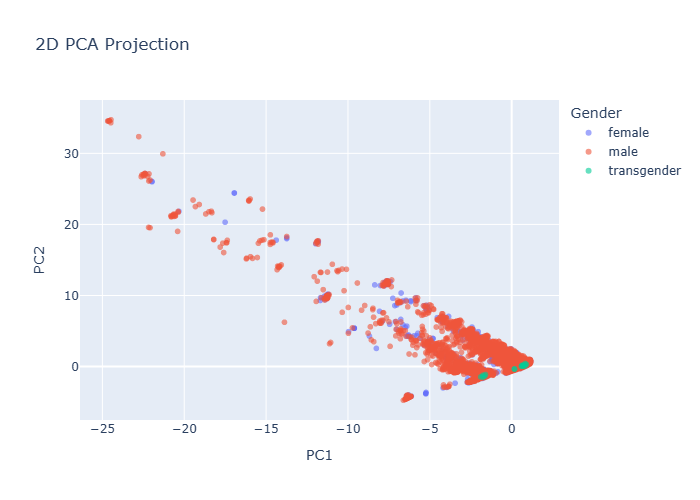

In [60]:
fig = px.scatter(
    pca_df,
    x="PC1",
    y="PC2",
    color="Gender",
    opacity=0.6,
    title="2D PCA Projection"
)
fig.show()


In [61]:
pca_df_3d = pd.DataFrame(
    X_pca[:, :3],
    columns=["PC1", "PC2", "PC3"]
)

pca_df_3d["Education"] = df["Education_Level_label"]


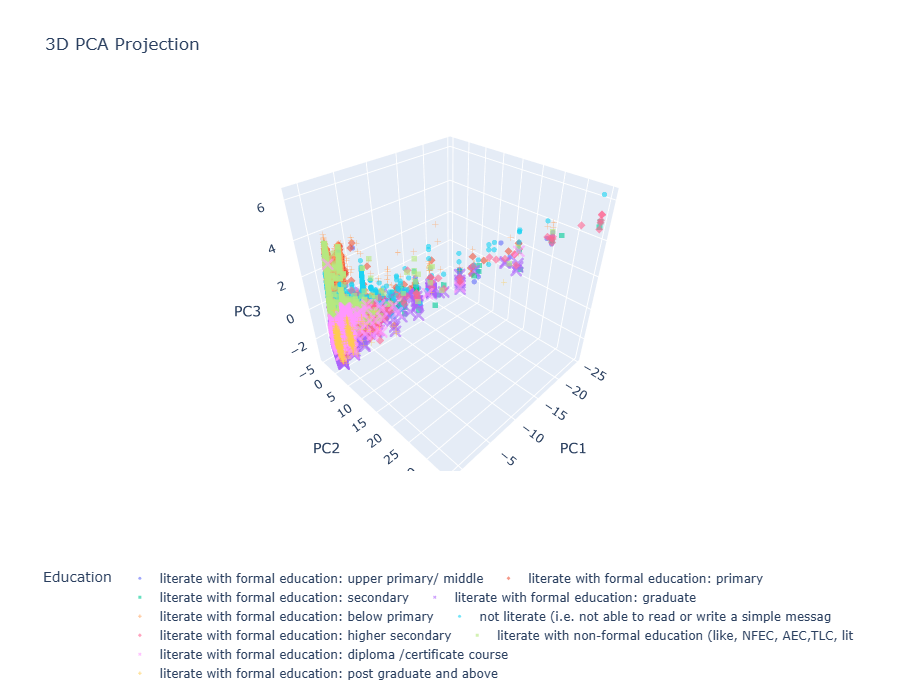

In [62]:
fig = px.scatter_3d(
    pca_df_3d,
    x="PC1",
    y="PC2",
    z="PC3",
    color="Education",
    symbol="Education",
    hover_name="Education",
    opacity=0.6,
    title="3D PCA Projection",
    width=900,
    height=700,
    size_max=10
)

fig.update_traces(marker=dict(size=3))

fig.update_layout(
    legend=dict(
        orientation="h",
        yanchor="top",
        y=-0.25,
        xanchor="center",
        x=0.5
    ),
    margin=dict(b=120)
)

fig.show()


In [63]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(X_pca[:, :3])

pca_df_3d["Cluster"] = clusters


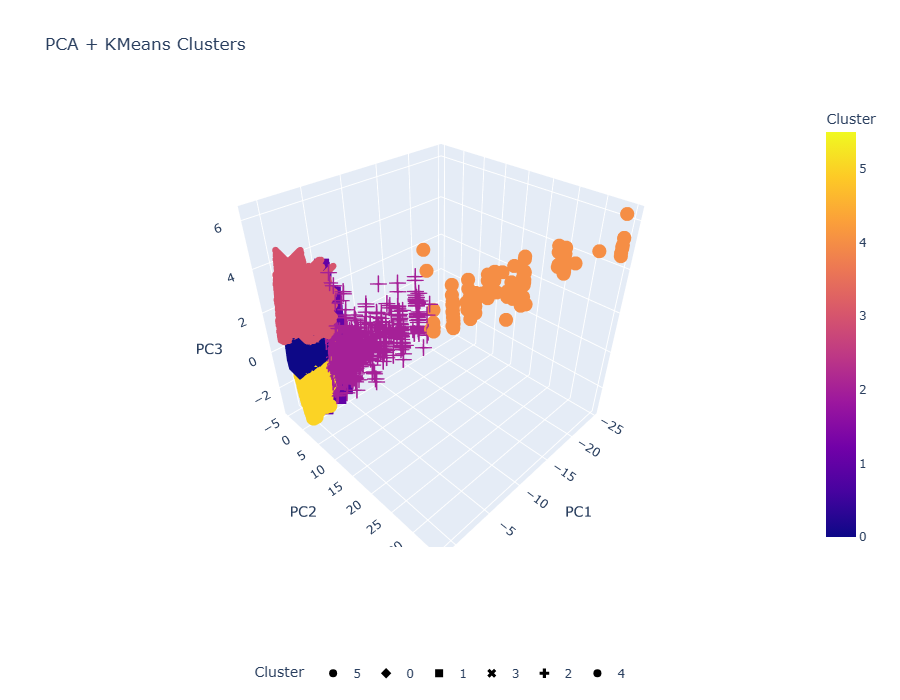

In [64]:
import plotly.express as px

fig = px.scatter_3d(
    pca_df_3d,
    x="PC1",
    y="PC2",
    z="PC3",
    color="Cluster",
    symbol="Cluster",
    title="PCA + KMeans Clusters",
    width=900,
    height=700,
)

fig.update_layout(
    legend=dict(
        orientation="h",
        yanchor="top",
        y=-0.25,
        xanchor="center",
        x=0.5
    ),
    margin=dict(b=120)
)

fig.show()
